In [ ]:
!pip install -q yfinance

### Gracias a :
- https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm
- https://www.kaggle.com/code/avikumart/timeseries-stock-price-analysis-forecasting

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

## **yfinance** es una biblioteca de Python de código abierto que proporciona una interfaz para descargar datos históricos y en tiempo real de Yahoo Finance. Permite a los programadores y analistas obtener información bursátil detallada, como datos de precios de acciones, estados financieros, dividendos y más, directamente desde su código.

In [92]:
# Para tener acceso a los datos del movimiento bursátil
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

In [93]:
# Las acciones de empresas de tecnología con las que trabajaremos
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Definir fecha de inicio y de fin de la captura de datos
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN] # Lista de pandas dataframes
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)


/tmp/ipython-input-1481869982.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1481869982.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1481869982.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1481869982.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2025-10-03,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,219.509995,224.199997,219.339996,223.440002,43639000.0
2025-10-06,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,220.899994,221.729996,216.029999,221.000000,43690900.0
2025-10-07,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,221.779999,222.889999,220.169998,220.880005,31194700.0
2025-10-08,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,225.220001,226.729996,221.190002,222.919998,46686000.0
2025-10-09,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,227.740005,228.210007,221.750000,225.000000,46412100.0
2025-10-10,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,216.369995,228.250000,216.000000,226.210007,72367500.0
2025-10-13,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,220.070007,220.679993,217.039993,217.699997,37809700.0
2025-10-14,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,216.389999,219.320007,212.600006,215.559998,45665600.0


### Los datos de yfinance en Python se entregan principalmente en formato de DataFrame de Pandas. Este formato tabular se utiliza para representar los datos históricos, como los precios de apertura, máximo, mínimo y cierre, el volumen y la fecha.
### Para múltiples tickers, yfinance crea un DataFrame con encabezados de columna multinivel, que se pueden organizar en un solo nivel para simplificar.
  - Formato principal: DataFrame de Pandas
    - Datos tabulares: Los resultados de la función history() se devuelven como un DataFrame de Pandas, que es una estructura de datos bidimensional con etiquetas de fila y columna.
    - Columnas estándar: Las columnas típicas incluyen Open, High, Low, Close y Volume.
    - Índice: El índice del DataFrame suele ser la fecha y hora de las operaciones.
  - Para datos de múltiples tickers
    - Columnas multinivel: Si obtienes datos de varios símbolos a la vez (por ejemplo, yf.download(['AAPL', 'MSFT'], start='2023-01-01')), el DataFrame resultante tendrá una estructura de columnas multinivel.
    - Nivelación de columnas: Para facilitar el acceso, es posible aplanar estas columnas multinivel a un solo nivel.
### **NOTA**
  - En el contexto bursátil, un ticker es un código único, generalmente alfanumérico, que identifica un valor negociado en una bolsa de valores, como una acción, un ETF o una materia prima. Su propósito es ofrecer una abreviatura concisa para facilitar la rápida identificación, búsqueda e intercambio de activos, ya que usar el nombre completo sería poco práctico dada la gran cantidad de empresas cotizadas.
    - Identificación única: Cada empresa tiene un ticker único en cada bolsa de valores. Por ejemplo, el ticker de Apple es AAPL en el NASDAQ.
    - Función: Permite identificar y realizar seguimiento de activos de manera eficiente, tanto en plataformas de trading como en noticias financieras.
    - Composición: Generalmente consiste en letras, aunque a veces pueden incluir números, y su longitud y formato pueden variar según la bolsa de valores.
    - Origen del término: Proviene del inglés "tick", que se refiere a las variaciones de precios que se registraban en un antiguo instrumento telegrafico que imprimía los precios en una cinta.

## Entendimiento de los datos descargados con **yfinance**

In [94]:
company_list

[Price            Close        High         Low        Open    Volume  \
 Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
 Date                                                                   
 2024-10-16  230.706299  231.044720  228.775283  230.527140  34082200   
 2024-10-17  231.074570  232.766707  229.452131  232.348639  32993800   
 2024-10-18  233.911362  235.085888  232.925942  235.085888  46431500   
 2024-10-21  235.384506  235.752803  233.363911  233.363911  36254500   
 2024-10-22  234.767395  235.125728  231.522502  232.806520  38846600   
 ...                ...         ...         ...         ...       ...   
 2025-10-10  245.270004  256.380005  244.000000  254.940002  61999100   
 2025-10-13  247.660004  249.690002  245.559998  249.380005  38142900   
 2025-10-14  247.770004  248.850006  244.699997  246.600006  35478000   
 2025-10-15  249.339996  251.820007  247.470001  249.490005  33893600   
 2025-10-16  247.449997  249.039993  245.130005  24

In [95]:
company

Price,Close,High,Low,Open,Volume,company_name
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,
Date,,,,,,
2024-10-16,186.889999,187.779999,185.610001,187.050003,23456800,AMAZON
2024-10-17,187.529999,188.940002,186.000000,188.220001,25039400,AMAZON
2024-10-18,188.990005,190.740005,186.279999,187.149994,37417700,AMAZON
2024-10-21,189.070007,189.460007,186.399994,188.050003,24639400,AMAZON
2024-10-22,189.699997,191.520004,186.979996,188.350006,29650600,AMAZON
...,...,...,...,...,...,...
2025-10-10,216.369995,228.250000,216.000000,226.210007,72367500,AMAZON
2025-10-13,220.070007,220.679993,217.039993,217.699997,37809700,AMAZON


In [96]:
# Acceder a una columna con un dataframe multiIndex
# Por ejemplo acceder la columna 'Close' para 'AMZN'
display(df.loc[:, ('Close', 'AMZN')])

,Close
,AMZN
Date,
2024-10-16,NaN
2024-10-17,NaN
2024-10-18,NaN
2024-10-21,NaN
2024-10-22,NaN
...,...
2025-10-10,216.369995
2025-10-13,220.070007


In [97]:
# Para acceder a una fila usar un string del index
df.loc['2025-10-14']


Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2025-10-14,247.770004,248.850006,244.699997,246.600006,35478000.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-10-14,NaN,NaN,NaN,NaN,NaN,GOOGLE,246.190002,248.024994,241.177994,241.755005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-10-14,NaN,NaN,NaN,NaN,NaN,MICROSOFT,NaN,NaN,NaN,NaN,...,513.570007,515.280029,506.0,510.230011,14684300.0,NaN,NaN,NaN,NaN,NaN
2025-10-14,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,216.389999,219.320007,212.600006,215.559998,45665600.0


In [98]:
aaa = company.loc['2024-10-14':'2025-10-14', ('Close', 'AMZN')]
print(aaa)

Date
2024-10-16    186.889999
2024-10-17    187.529999
2024-10-18    188.990005
2024-10-21    189.070007
2024-10-22    189.699997
                 ...    
2025-10-08    225.220001
2025-10-09    227.740005
2025-10-10    216.369995
2025-10-13    220.070007
2025-10-14    216.389999
Name: (Close, AMZN), Length: 249, dtype: float64


In [99]:
df

Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-16,230.706299,231.044720,228.775283,230.527140,34082200.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-17,231.074570,232.766707,229.452131,232.348639,32993800.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-18,233.911362,235.085888,232.925942,235.085888,46431500.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-21,235.384506,235.752803,233.363911,233.363911,36254500.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-22,234.767395,235.125728,231.522502,232.806520,38846600.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-10,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,216.369995,228.250000,216.000000,226.210007,72367500.0
2025-10-13,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,220.070007,220.679993,217.039993,217.699997,37809700.0


In [100]:
df.shape

(1004, 21)

In [101]:
company_list[0]

Price,Close,High,Low,Open,Volume,company_name
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2024-10-16,230.706299,231.044720,228.775283,230.527140,34082200,APPLE
2024-10-17,231.074570,232.766707,229.452131,232.348639,32993800,APPLE
2024-10-18,233.911362,235.085888,232.925942,235.085888,46431500,APPLE
2024-10-21,235.384506,235.752803,233.363911,233.363911,36254500,APPLE
2024-10-22,234.767395,235.125728,231.522502,232.806520,38846600,APPLE
...,...,...,...,...,...,...
2025-10-10,245.270004,256.380005,244.000000,254.940002,61999100,APPLE
2025-10-13,247.660004,249.690002,245.559998,249.380005,38142900,APPLE


In [102]:
company_list.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [103]:
company

Price,Close,High,Low,Open,Volume,company_name
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,
Date,,,,,,
2024-10-16,186.889999,187.779999,185.610001,187.050003,23456800,AMAZON
2024-10-17,187.529999,188.940002,186.000000,188.220001,25039400,AMAZON
2024-10-18,188.990005,190.740005,186.279999,187.149994,37417700,AMAZON
2024-10-21,189.070007,189.460007,186.399994,188.050003,24639400,AMAZON
2024-10-22,189.699997,191.520004,186.979996,188.350006,29650600,AMAZON
...,...,...,...,...,...,...
2025-10-10,216.369995,228.250000,216.000000,226.210007,72367500,AMAZON
2025-10-13,220.070007,220.679993,217.039993,217.699997,37809700,AMAZON


In [104]:
company

Price,Close,High,Low,Open,Volume,company_name
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,
Date,,,,,,
2024-10-16,186.889999,187.779999,185.610001,187.050003,23456800,AMAZON
2024-10-17,187.529999,188.940002,186.000000,188.220001,25039400,AMAZON
2024-10-18,188.990005,190.740005,186.279999,187.149994,37417700,AMAZON
2024-10-21,189.070007,189.460007,186.399994,188.050003,24639400,AMAZON
2024-10-22,189.699997,191.520004,186.979996,188.350006,29650600,AMAZON
...,...,...,...,...,...,...
2025-10-10,216.369995,228.250000,216.000000,226.210007,72367500,AMAZON
2025-10-13,220.070007,220.679993,217.039993,217.699997,37809700,AMAZON


In [105]:
company.index

DatetimeIndex(['2024-10-16', '2024-10-17', '2024-10-18', '2024-10-21',
               '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25',
               '2024-10-28', '2024-10-29',
               ...
               '2025-10-03', '2025-10-06', '2025-10-07', '2025-10-08',
               '2025-10-09', '2025-10-10', '2025-10-13', '2025-10-14',
               '2025-10-15', '2025-10-16'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [106]:
AAPL

Price,Close,High,Low,Open,Volume,company_name
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2024-10-16,230.706299,231.044720,228.775283,230.527140,34082200,APPLE
2024-10-17,231.074570,232.766707,229.452131,232.348639,32993800,APPLE
2024-10-18,233.911362,235.085888,232.925942,235.085888,46431500,APPLE
2024-10-21,235.384506,235.752803,233.363911,233.363911,36254500,APPLE
2024-10-22,234.767395,235.125728,231.522502,232.806520,38846600,APPLE
...,...,...,...,...,...,...
2025-10-10,245.270004,256.380005,244.000000,254.940002,61999100,APPLE
2025-10-13,247.660004,249.690002,245.559998,249.380005,38142900,APPLE


In [107]:
df.columns

MultiIndex([(       'Close', 'AAPL'),
            (        'High', 'AAPL'),
            (         'Low', 'AAPL'),
            (        'Open', 'AAPL'),
            (      'Volume', 'AAPL'),
            ('company_name',     ''),
            (       'Close', 'GOOG'),
            (        'High', 'GOOG'),
            (         'Low', 'GOOG'),
            (        'Open', 'GOOG'),
            (      'Volume', 'GOOG'),
            (       'Close', 'MSFT'),
            (        'High', 'MSFT'),
            (         'Low', 'MSFT'),
            (        'Open', 'MSFT'),
            (      'Volume', 'MSFT'),
            (       'Close', 'AMZN'),
            (        'High', 'AMZN'),
            (         'Low', 'AMZN'),
            (        'Open', 'AMZN'),
            (      'Volume', 'AMZN')],
           names=['Price', 'Ticker'])

In [108]:
df.head()

Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-16,230.706299,231.044720,228.775283,230.527140,34082200.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-17,231.074570,232.766707,229.452131,232.348639,32993800.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-18,233.911362,235.085888,232.925942,235.085888,46431500.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-21,235.384506,235.752803,233.363911,233.363911,36254500.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-22,234.767395,235.125728,231.522502,232.806520,38846600.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
df.tail()

Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2025-10-10,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,216.369995,228.250000,216.000000,226.210007,72367500.0
2025-10-13,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,220.070007,220.679993,217.039993,217.699997,37809700.0
2025-10-14,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,216.389999,219.320007,212.600006,215.559998,45665600.0
2025-10-15,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,215.570007,217.710007,212.660004,216.619995,45909500.0
2025-10-16,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,214.470001,218.589996,212.810104,215.669998,40439174.0


In [110]:
df.shape

(1004, 21)

In [111]:
df.dtypes

,,0
Price,Ticker,
Close,AAPL,float64
High,AAPL,float64
Low,AAPL,float64
Open,AAPL,float64
Volume,AAPL,float64
company_name,,object
Close,GOOG,float64
High,GOOG,float64
Low,GOOG,float64


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2024-10-16 to 2025-10-16
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     251 non-null    float64
 1   (High, AAPL)      251 non-null    float64
 2   (Low, AAPL)       251 non-null    float64
 3   (Open, AAPL)      251 non-null    float64
 4   (Volume, AAPL)    251 non-null    float64
 5   (company_name, )  1004 non-null   object 
 6   (Close, GOOG)     251 non-null    float64
 7   (High, GOOG)      251 non-null    float64
 8   (Low, GOOG)       251 non-null    float64
 9   (Open, GOOG)      251 non-null    float64
 10  (Volume, GOOG)    251 non-null    float64
 11  (Close, MSFT)     251 non-null    float64
 12  (High, MSFT)      251 non-null    float64
 13  (Low, MSFT)       251 non-null    float64
 14  (Open, MSFT)      251 non-null    float64
 15  (Volume, MSFT)    251 non-null    float64
 16  (Close, AMZN)     251 no

In [113]:
df['Close', 'AMZN']

,Close
,AMZN
Date,
2024-10-16,NaN
2024-10-17,NaN
2024-10-18,NaN
2024-10-21,NaN
2024-10-22,NaN
...,...
2025-10-10,216.369995
2025-10-13,220.070007


In [114]:
df.isnull().sum()

,,0
Price,Ticker,
Close,AAPL,753
High,AAPL,753
Low,AAPL,753
Open,AAPL,753
Volume,AAPL,753
company_name,,0
Close,GOOG,753
High,GOOG,753
Low,GOOG,753


In [115]:
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,224.598314,226.888475,222.042680,224.314115,5.381921e+07
std,18.324831,17.857807,18.540465,18.335309,2.324208e+07
min,171.998993,189.875235,168.796839,171.530131,2.323470e+07
25%,209.776924,211.805642,207.672861,209.776924,3.979220e+07
50%,227.160004,229.345837,224.759995,226.446131,4.707090e+07
75%,238.014999,240.125000,235.281733,237.517865,5.680375e+07
max,258.103729,259.239990,256.718662,257.989990,1.843959e+08


In [116]:
AMZN.describe()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,213.037889,215.411833,210.407131,213.009403,4.313980e+07
std,16.717712,16.323742,17.161447,16.938057,1.843504e+07
min,167.320007,169.600006,161.380005,162.000000,1.500750e+07
25%,201.404999,203.714996,199.070000,200.805000,3.158850e+07
50%,216.979996,219.970001,214.149994,217.399994,3.849620e+07
75%,226.490005,228.440002,224.049995,226.210007,4.708060e+07
max,242.059998,242.520004,238.029999,239.020004,1.231594e+08


In [117]:
df.head(5)

Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-16,230.706299,231.044720,228.775283,230.527140,34082200.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-17,231.074570,232.766707,229.452131,232.348639,32993800.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-18,233.911362,235.085888,232.925942,235.085888,46431500.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-21,235.384506,235.752803,233.363911,233.363911,36254500.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-22,234.767395,235.125728,231.522502,232.806520,38846600.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2024-10-16 to 2025-10-16
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     251 non-null    float64
 1   (High, AAPL)      251 non-null    float64
 2   (Low, AAPL)       251 non-null    float64
 3   (Open, AAPL)      251 non-null    float64
 4   (Volume, AAPL)    251 non-null    float64
 5   (company_name, )  1004 non-null   object 
 6   (Close, GOOG)     251 non-null    float64
 7   (High, GOOG)      251 non-null    float64
 8   (Low, GOOG)       251 non-null    float64
 9   (Open, GOOG)      251 non-null    float64
 10  (Volume, GOOG)    251 non-null    float64
 11  (Close, MSFT)     251 non-null    float64
 12  (High, MSFT)      251 non-null    float64
 13  (Low, MSFT)       251 non-null    float64
 14  (Open, MSFT)      251 non-null    float64
 15  (Volume, MSFT)    251 non-null    float64
 16  (Close, AMZN)     251 no

In [119]:
print(df["company_name"])

Date
2024-10-16     APPLE
2024-10-17     APPLE
2024-10-18     APPLE
2024-10-21     APPLE
2024-10-22     APPLE
               ...  
2025-10-10    AMAZON
2025-10-13    AMAZON
2025-10-14    AMAZON
2025-10-15    AMAZON
2025-10-16    AMAZON
Name: company_name, Length: 1004, dtype: object


In [120]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-10-16 to 2025-10-16
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     251 non-null    float64
 1   (High, AAPL)      251 non-null    float64
 2   (Low, AAPL)       251 non-null    float64
 3   (Open, AAPL)      251 non-null    float64
 4   (Volume, AAPL)    251 non-null    int64  
 5   (company_name, )  251 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


## 1.- Cambio histórico del precio de las acciones
  - *Closing Price*

      - Closing Price es el último precio al que se negociaron las acciones
       durante un día regular.
       - El *Closing Price* de una acción es el benchmark standard usado por inversionistas para hacer seguimiento de su comportamento en el tiempo.

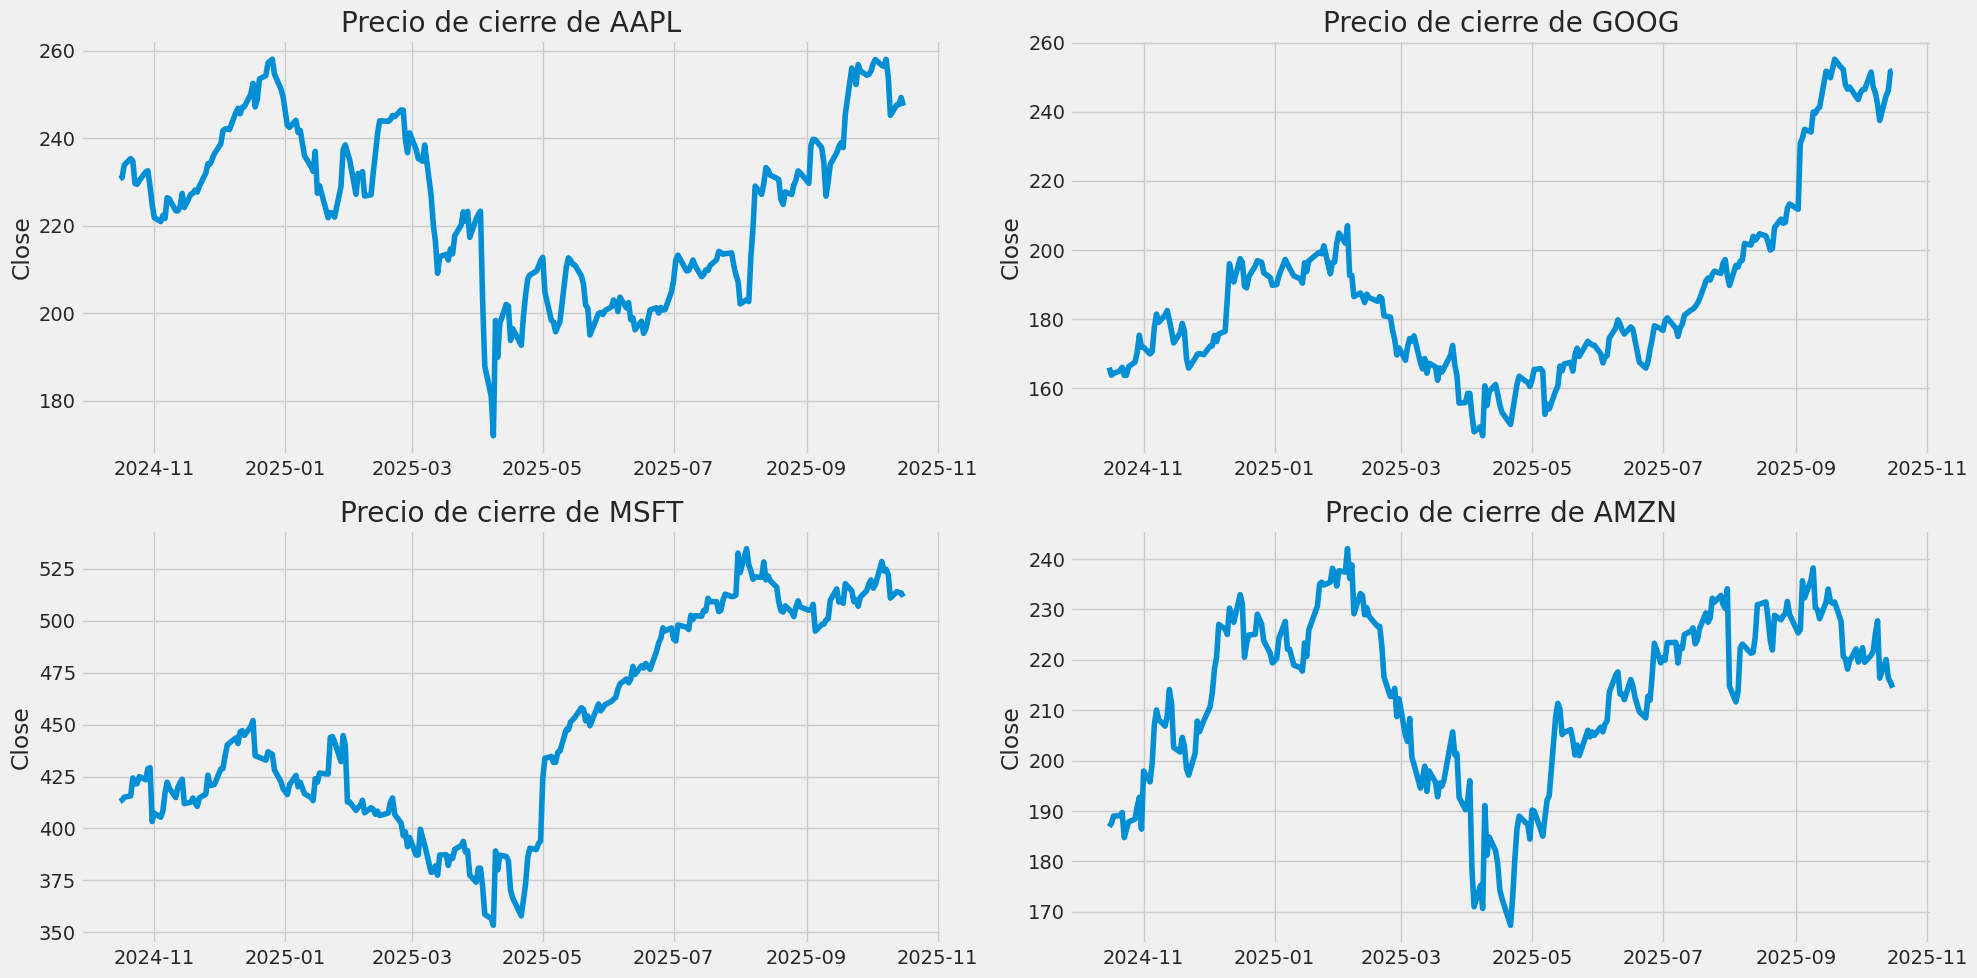

In [121]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10)) # Crear una cuadrícula 2x2.
# Transformar una estructura de datos bidimensional (una matriz o arreglo de dos dimensiones) en una unidimensional (un arreglo plano)
# para poder recorrer sus elementos uno por uno de forma sencilla, sin tener que lidiar con dos índices (fila y columna) a la vez.
axes = axes.flatten()

for i, company in enumerate(company_list):
    axes[i].plot(company['Close'])
    axes[i].set_ylabel('Close')
    axes[i].set_xlabel(None)
    axes[i].set_title(f"Precio de cierre de {tech_list[i]}")

plt.tight_layout()
plt.show()


  - *Volumen de ventas*
    - Valores que se negocian en un período de tiempo, normalmente diario, por ejemplo entre apertura y cierre diarios. El volumen negociado y sus variaciones en el tiempo son indicadores importantes para los operadores técnicos.


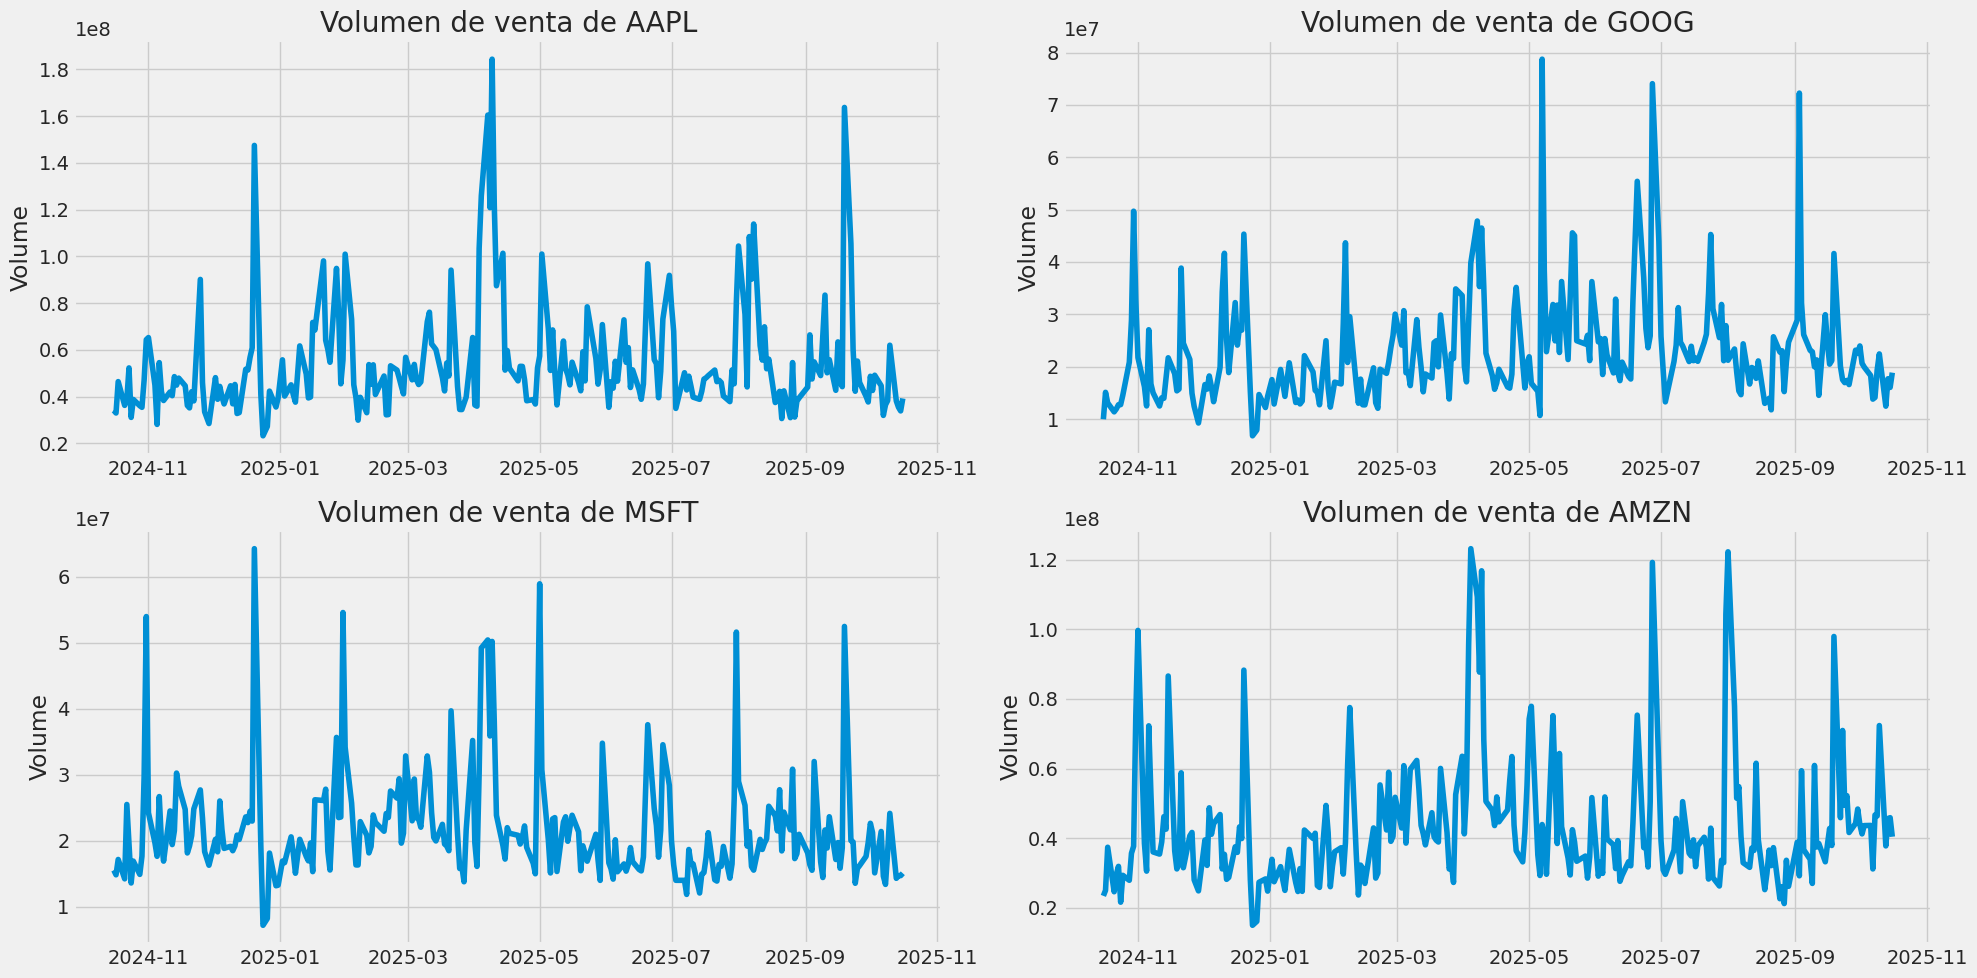

In [122]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()

for i, company in enumerate(company_list):
    axes[i].plot(company['Volume'])
    axes[i].set_ylabel('Volume')
    axes[i].set_xlabel(None)
    axes[i].set_title(f"Volumen de venta de {tech_list[i]}")

plt.tight_layout()
plt.show()

## 2.- Moving Average (Promedios móviles) que son y para que sirven
  - Las medias móviles son indicadores técnicos que suavizan los datos de precios de una acción para identificar y seguir las tendencias, ya que al promediar los precios pasados, ayudan a filtrar el "ruido" de las fluctuaciones aleatorias.
  - Se utilizan principalmente para detectar la dirección de una tendencia, identificar posibles niveles de "soporte" y "resistencia", y ***generar señales de compra o venta***.
### Para qué sirven
  - **Identificar la tendencia**: Una media móvil ascendente sugiere una tendencia alcista, mientras que una descendente indica una tendencia bajista.
  - **Suavizar el ruido del mercado**: Al promediar los precios, la media móvil reduce el efecto de las fluctuaciones diarias o de corto plazo, haciendo que la tendencia general sea más visible.
  - **Detectar soporte y resistencia**: El precio a menudo tiende a rebotar en una media móvil, identificándola como un nivel de soporte (si el precio está por encima) o resistencia (si está por debajo).
  - **Generar señales de trading**: Una señal común es el cruce de medias móviles, donde una media móvil rápida (por ejemplo, de 50 días) cruza por encima o por debajo de una media móvil lenta (por ejemplo, de 200 días) para indicar un cambio de tendencia.
  - **Evaluar el impulso**: El ángulo de la media móvil puede indicar la fuerza del impulso. Una pendiente pronunciada sugiere un impulso fuerte.

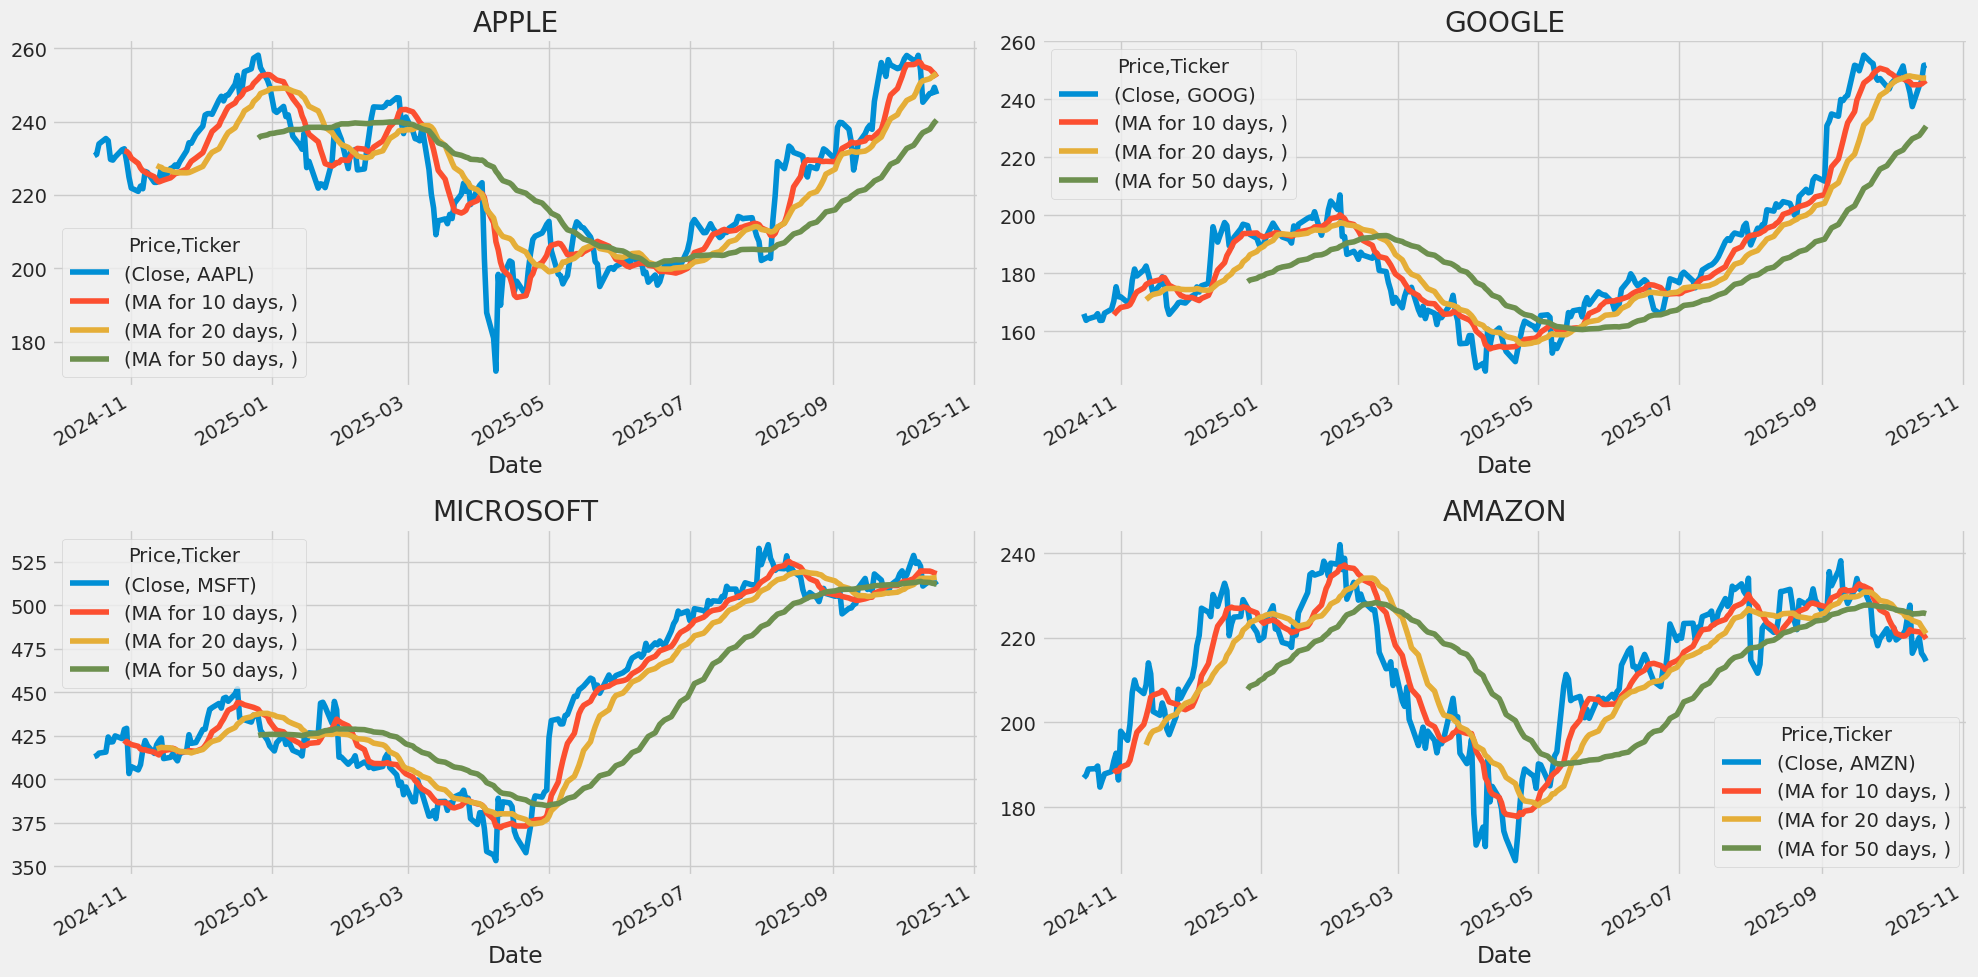

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

ma_day = [10,20,50]

# Vamos a trabajar con una copia de cada dataframe para conservarlos inalterables
AAPL_copia = AAPL.copy()
GOOG_copia = GOOG.copy()
MSFT_copia = MSFT.copy()
AMZN_copia = AMZN.copy()
company_dataframes = [AAPL_copia, GOOG_copia, MSFT_copia, AMZN_copia] # List of your company dataframes

for ma in ma_day:
    for company_df in company_dataframes:
        column_name = f'MA for {ma} days'
        company_df[column_name] = company_df['Close'].rolling(window=ma).mean()

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

AAPL_copia[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG_copia[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT_copia[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN_copia[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.show() # Display the plot

### Podemos ver en el gráfico que los mejores valores para medir los promedios móviles son 10 y 20 días porque todavía se capturan tendencias sin ruido.

In [124]:
AAPL_copia

Price,Close,High,Low,Open,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2024-10-16,230.706299,231.044720,228.775283,230.527140,34082200,APPLE,NaN,NaN,NaN
2024-10-17,231.074570,232.766707,229.452131,232.348639,32993800,APPLE,NaN,NaN,NaN
2024-10-18,233.911362,235.085888,232.925942,235.085888,46431500,APPLE,NaN,NaN,NaN
2024-10-21,235.384506,235.752803,233.363911,233.363911,36254500,APPLE,NaN,NaN,NaN
2024-10-22,234.767395,235.125728,231.522502,232.806520,38846600,APPLE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-10-10,245.270004,256.380005,244.000000,254.940002,61999100,APPLE,255.020000,251.128499,236.989977
2025-10-13,247.660004,249.690002,245.559998,249.380005,38142900,APPLE,254.343001,251.676499,237.900165


In [125]:
AAPL # no se altera

Price,Close,High,Low,Open,Volume,company_name
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2024-10-16,230.706299,231.044720,228.775283,230.527140,34082200,APPLE
2024-10-17,231.074570,232.766707,229.452131,232.348639,32993800,APPLE
2024-10-18,233.911362,235.085888,232.925942,235.085888,46431500,APPLE
2024-10-21,235.384506,235.752803,233.363911,233.363911,36254500,APPLE
2024-10-22,234.767395,235.125728,231.522502,232.806520,38846600,APPLE
...,...,...,...,...,...,...
2025-10-10,245.270004,256.380005,244.000000,254.940002,61999100,APPLE
2025-10-13,247.660004,249.690002,245.559998,249.380005,38142900,APPLE


## 3. Rendimiento diario del valor de las acciones en promedio.
  - Analicemos el riesgo financiero. Para esto necesitamos mirar mas de cerca los cambios diarios de las acciones y no solamente su valor absoluto.

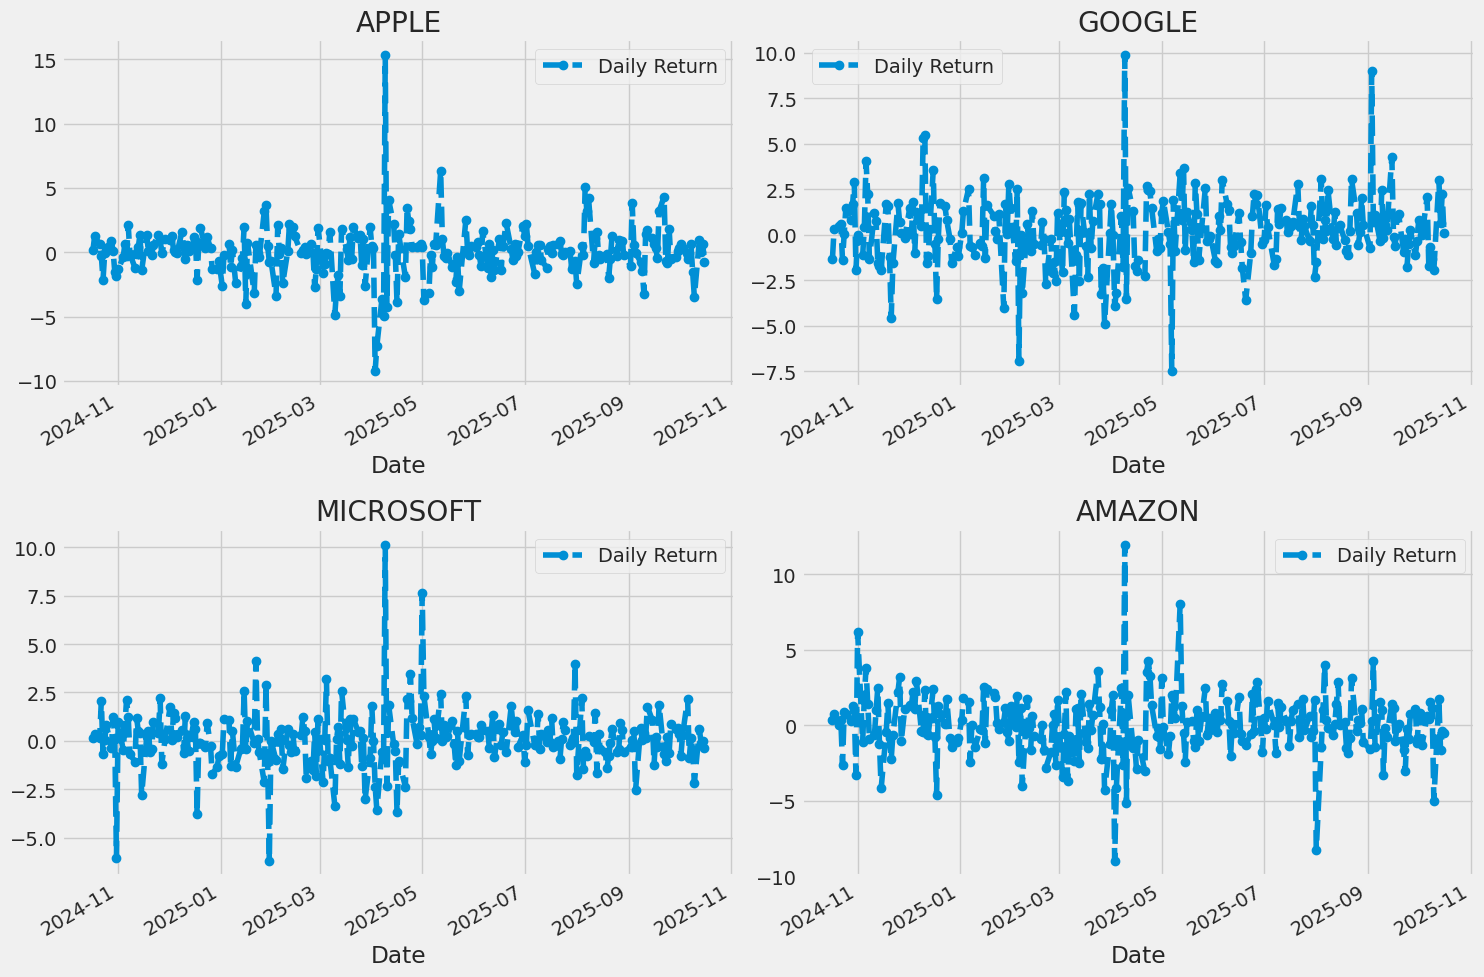

In [126]:
# Usamos pct_change para encontrar el porcentaje de cambio diario
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()*100 # Mutiplicado por 100 para ver valores reales

AAPL_copia = AAPL.copy()
GOOG_copia = GOOG.copy()
MSFT_copia = MSFT.copy()
AMZN_copia = AMZN.copy()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL_copia['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG_copia['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT_copia['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN_copia['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.show()

### **pct_change** es una función de la biblioteca Pandas en Python que calcula el **cambio porcentual entre el elemento actual y un elemento anterior en una serie de tiempo o un conjunto de datos**.
### Esta función es muy útil en análisis financieros, **para calcular rendimientos diarios**, o para comprender la evolución de los datos a lo largo del tiempo.
  - Fórmula: La fórmula básica que aplica es (valor actual - valor anterior) / valor anterior * 100.
  - Periodos (periods): Por defecto, compara el elemento actual con el inmediatamente anterior (periods=1). Puedes cambiar esto para comparar con valores más lejanos, como periods=30 para una comparación con 30 periodos atrás.
  - Resultados: **El resultado se devuelve como un decimal por defecto. Para obtener un porcentaje legible, se debe multiplicar por 100**.
  - Valores NaN: Los primeros valores de la serie resultante serán NaN (Not a Number) porque no hay un valor anterior con el que realizar la comparación.
### Ejemplo de uso     
  - Rendimiento diario: En finanzas, es común usar pct_change() para calcular el rendimiento diario de una acción, comparando el precio de cierre de hoy con el de ayer.

In [127]:
AAPL_copia

Price,Close,High,Low,Open,Volume,company_name,Daily Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2024-10-16,230.706299,231.044720,228.775283,230.527140,34082200,APPLE,NaN
2024-10-17,231.074570,232.766707,229.452131,232.348639,32993800,APPLE,0.159628
2024-10-18,233.911362,235.085888,232.925942,235.085888,46431500,APPLE,1.227652
2024-10-21,235.384506,235.752803,233.363911,233.363911,36254500,APPLE,0.629788
2024-10-22,234.767395,235.125728,231.522502,232.806520,38846600,APPLE,-0.262172
...,...,...,...,...,...,...,...
2025-10-10,245.270004,256.380005,244.000000,254.940002,61999100,APPLE,-3.452208
2025-10-13,247.660004,249.690002,245.559998,249.380005,38142900,APPLE,0.974436


In [128]:
AAPL_copia.describe() # Podemos ver el valor máximo del rendimiento diario de las acciones de Aple (15.32%)

Price,Close,High,Low,Open,Volume,Daily Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,250.000000
mean,224.598314,226.888475,222.042680,224.314115,5.381921e+07,0.048572
std,18.324831,17.857807,18.540465,18.335309,2.324208e+07,2.043567
min,171.998993,189.875235,168.796839,171.530131,2.323470e+07,-9.245607
25%,209.776924,211.805642,207.672861,209.776924,3.979220e+07,-0.707418
50%,227.160004,229.345837,224.759995,226.446131,4.707090e+07,0.109457
75%,238.014999,240.125000,235.281733,237.517865,5.680375e+07,0.902234
max,258.103729,259.239990,256.718662,257.989990,1.843959e+08,15.328847


### Veamos el rendimiento diario promedio usando histograma

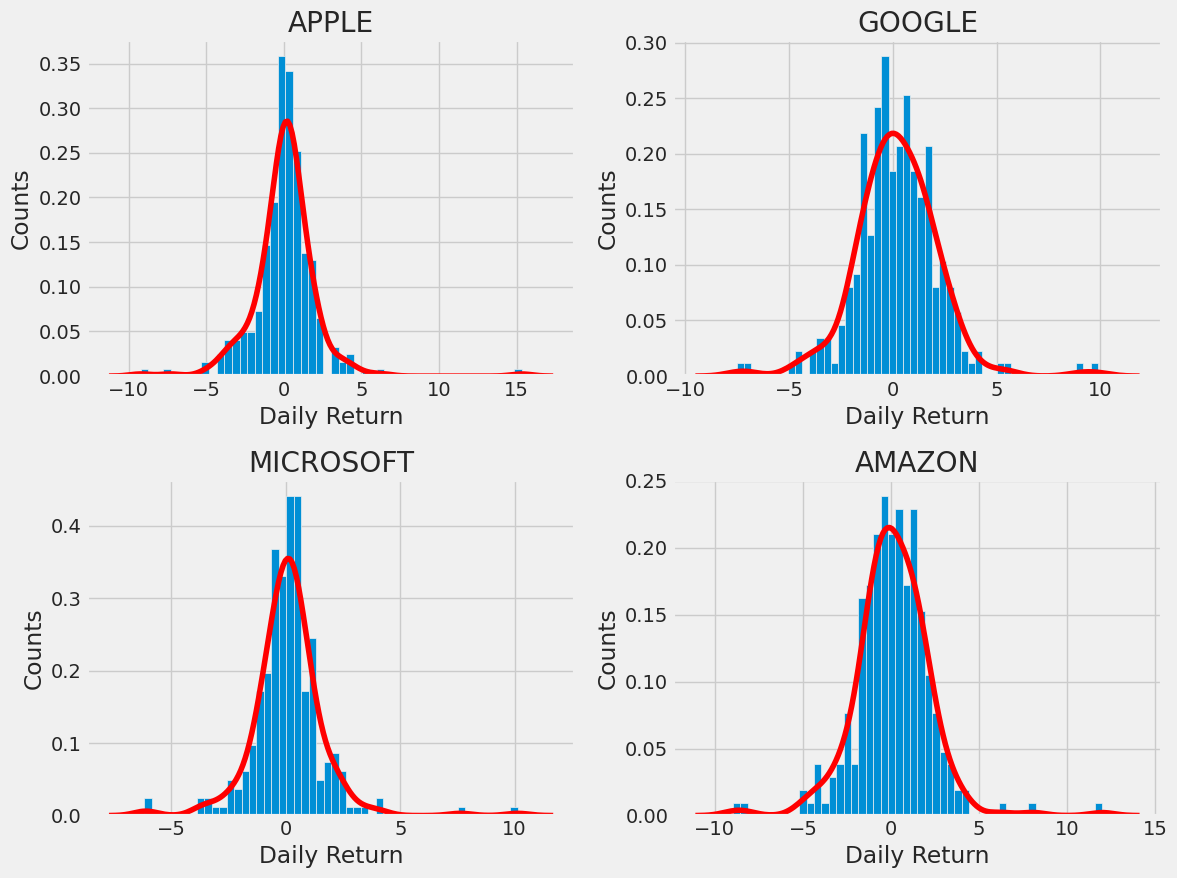

In [129]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    ax = plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50, ax=ax, density = True)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    sns.kdeplot(company['Daily Return'], ax=ax, color='r')
plt.tight_layout()
plt.show()

### Para explicar la rentabilidad diaria promedio (average daily return) usando un histograma, se muestra la frecuencia de los rendimientos diarios en un período, donde el **promedio** es el centro de la distribución.
### Un histograma ajustado con **rendimientos agrupados alrededor del promedio indica baja volatilidad**, mientras que un **histograma disperso con rendimientos muy dispersos señala alta volatilidad**, ya que el promedio es solo un punto central que no representa la volatilidad.
### Pasos para explicar la rentabilidad diaria promedio con un histograma:
  - Crea el histograma: Se grafica el número de días en el eje vertical y los rangos de los rendimientos diarios en el eje horizontal.
  - Identifica el promedio: La línea en el centro de la distribución representa el promedio de rentabilidad diaria.
  - Analiza la distribución:
    - Alta volatilidad: Si el histograma es ancho y los datos se dispersan en torno al promedio, esto indica alta volatilidad.
    - Baja volatilidad: Si los datos se agrupan estrechamente alrededor del promedio, la volatilidad es baja.
  - Conecta el promedio con la volatilidad: ***El promedio diario es un punto de referencia útil, pero la volatilidad (dispersión de los datos) es lo que realmente muestra qué tan predecibles son los rendimientos***.
## La volatilidad de las acciones es la medida de la magnitud y frecuencia de las fluctuaciones del precio de una acción durante un período de tiempo específico. ***Una alta volatilidad significa que el precio de la acción experimenta cambios bruscos y frecuentes, lo que implica un mayor riesgo, mientras que una baja volatilidad indica un movimiento más estable y predecible.***



## 4. Correlación entre acciones de diferentes empresas.
- En estadística, la correlación es una medida que cuantifica la relación lineal entre dos variables, indicando el grado y la dirección de su variación conjunta. Es importante recordar que correlación no implica causalidad, es decir, que dos variables estén relacionadas no significa que una sea la causa de la otra. Se mide entre -1.0 y 1.0.
- Dirección de la relación:
    - Correlación positiva: Las variables tienden a moverse en la misma dirección. Por ejemplo, a medida que la altura de una persona aumenta, su peso también tiende a aumentar.
    - Correlación negativa: Las variables tienden a moverse en direcciones opuestas. Por ejemplo, a medida que el precio de un producto aumenta, la demanda por ese producto tiende a disminuir.
- ¿Para qué se utiliza?
    - Describir relaciones: La correlación es una herramienta para describir relaciones simples entre variables sin establecer una relación de causa y efecto.
    - Análisis predictivo: Puede ser utilizada para hacer predicciones. Por ejemplo, una compañía eléctrica podría predecir la demanda de energía basándose en la correlación con la temperatura exterior.
    - Evitar correlaciones espurias: Es una buena práctica realizar un diagrama de dispersión para visualizar la relación entre las variables antes de calcular la correlación. Esto ayuda a evitar conclusiones erróneas.

- Analizaremos la rentabilidad de todas las acciones de nuestra lista.


In [130]:
# Cargar todos los precios de cierre de las acciones de nuestra lista de empresas tecnológicas en un solo DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Close']

/tmp/ipython-input-290403494.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  closing_df = yf.download(tech_list, start=start, end=end)['Close']
[*********************100%***********************]  4 of 4 completed


In [131]:
closing_df

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-10-16,230.706268,186.889999,166.013412,413.019226
2024-10-17,231.074570,187.529999,163.793121,413.614777
2024-10-18,233.911362,188.990005,164.330780,415.044037
2024-10-21,235.384506,189.070007,165.077515,415.659424
2024-10-22,234.767395,189.699997,166.093063,424.324402
...,...,...,...,...
2025-10-10,245.270004,216.369995,237.490005,510.959991
2025-10-13,247.660004,220.070007,244.639999,514.049988
2025-10-14,247.770004,216.389999,246.190002,513.570007


In [132]:
# Creamos un dataframe con la rentabilidad diaria de cada acción
tech_rets = closing_df.pct_change()*100
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-10-16,NaN,NaN,NaN,NaN
2024-10-17,0.159641,0.342447,-1.337417,0.144194
2024-10-18,1.227652,0.778546,0.328255,0.345553
2024-10-21,0.629788,0.042331,0.454409,0.148270
2024-10-22,-0.262172,0.333204,0.615195,2.084634


### Ahora podemos comparar la rentabilidad diaria de dos acciones para ver como están correlacionadas.

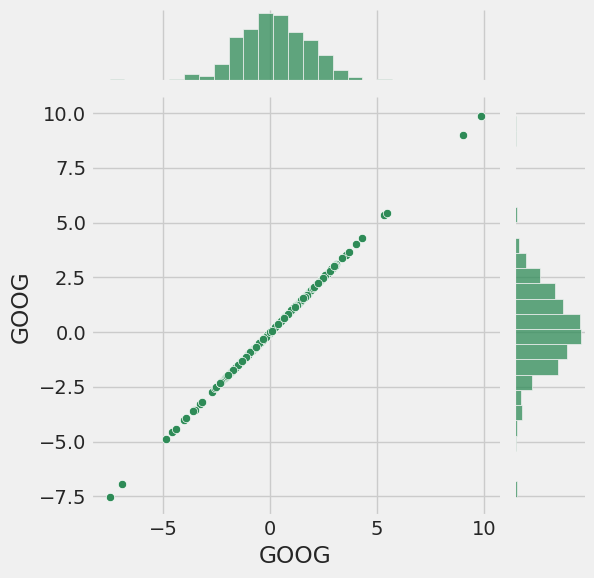

In [133]:
# Comparar Google con si mismo muestra una relación perfectamente lineal.
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

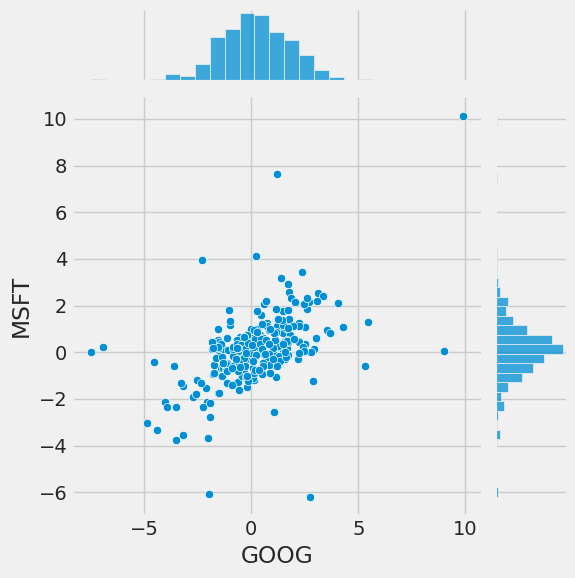

In [134]:
# Comparar la rentabilidad diaria de Google y Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

### Podemos facilmente repetir esta comparación para toda posible combinación de acciones en nuestra lista de empresas tecnológicas.

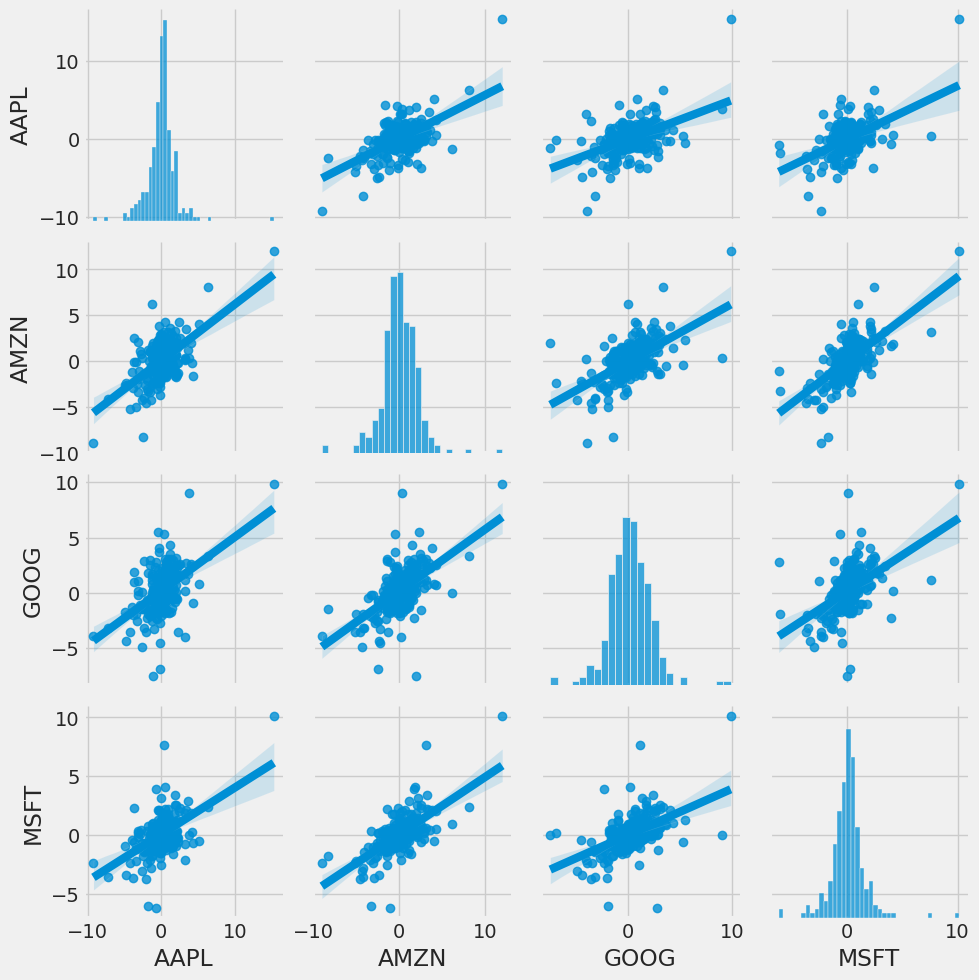

In [135]:
sns.pairplot(tech_rets, kind='reg')

  Interpretar un pairplot de Seaborn implica analizar una matriz de gráficos para entender tanto la distribución de las variables individuales como la relación entre cada par de variables en un conjunto de datos.
  Para interpretar un pairplot, debes enfocarte en dos áreas principales: la diagonal y los gráficos fuera de la diagonal.
  - Resumen del proceso de interpretación
    - Observa la diagonal: Revisa la forma, el centro y la dispersión de cada variable individual.
    - Explora los gráficos de dispersión: Busca patrones, correlaciones (positivas, negativas, nulas) y tipos de relaciones (lineales, no lineales).
    - Identifica clústeres y valores atípicos: Estos pueden ser puntos de datos interesantes que merecen una investigación más profunda.
    - Considera el hue si se usa: Evalúa cómo la variable categórica afecta las relaciones y distribuciones.
    - Utiliza los gráficos de forma complementaria: La información de la diagonal y los gráficos de dispersión se combinan para dar una imagen completa de tu conjunto de datos.
---
 Para interpretar un gráfico de dispersión, observa si los puntos forman un patrón que indique una relación entre las dos variables. Si los puntos se inclinan hacia arriba, hay una relación positiva (ambas variables aumentan juntas); si se inclinan hacia abajo, es una relación negativa (una aumenta mientras la otra disminuye). Si los puntos están dispersos al azar, no hay relación discernible.  
 - Pasos clave para la interpretación
    - Identificar la dirección y la fuerza:
      - Relación positiva: Los puntos tienden a subir de izquierda a derecha.
      - Relación negativa: Los puntos tienden a bajar de izquierda a derecha.
      - Sin relación: Los puntos parecen distribuidos aleatoriamente.
      - Fuerza de la relación: **Cuanto más cerca están los puntos entre sí, más fuerte es la correlación**. Una relación fuerte tiene puntos muy unidos a una línea imaginaria, mientras que una débil los tiene más dispersos.


 Si bien es cierto que la simplicidad de simplemente llamar a sns.pairplot() es fantastica, también podemos usar sns.PairGrid() para un completo control de la figura, incluyendo tipos de plots en la diagonal, el triangulo superior y el inferior.
 Un ejemplo a continuacióm.

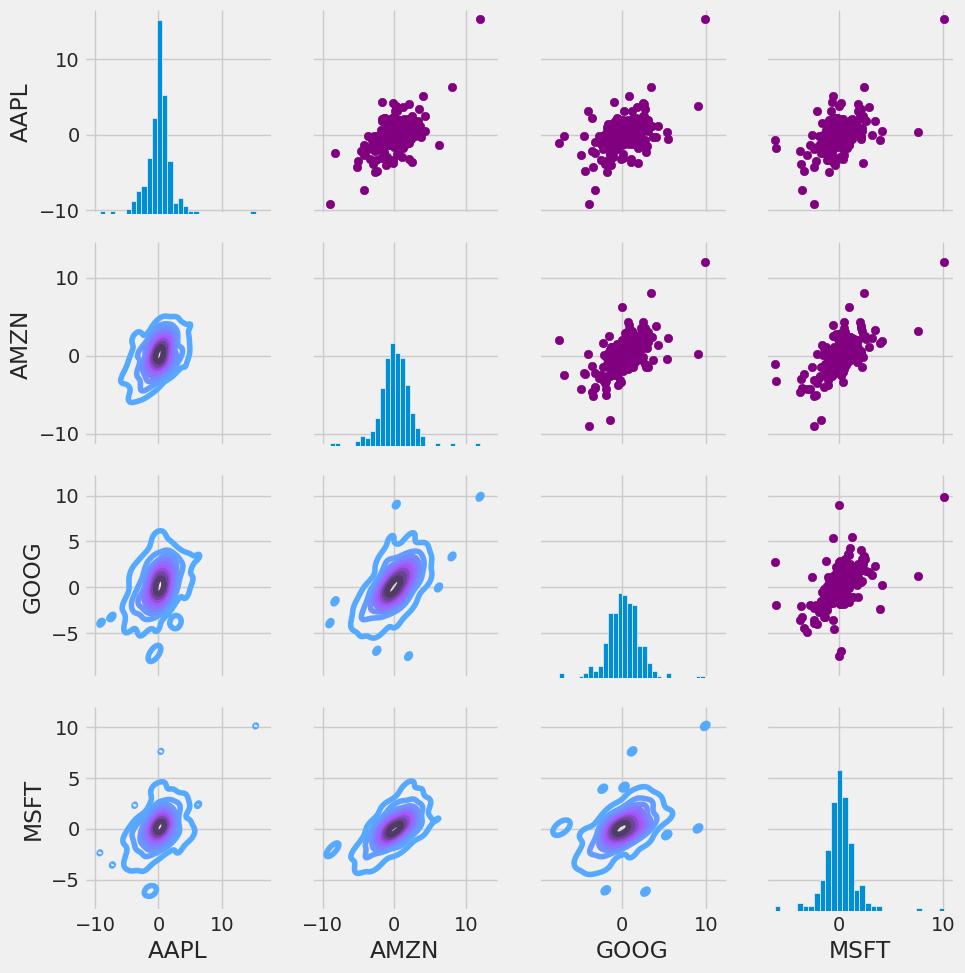

In [136]:
# Gráfico correlación de rentabilidad diaria de nuestras diferentes acciones.
# Configuramos nuestro gráfico con el nombre de returns_fig, llamamos PairPLot en el DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Con map_upper podemos especificar como se verá el triángulo superior.
return_fig.map_upper(plt.scatter, color='purple')

# Especificamos el triágulo inferior, incluyendo el tipo de gráfico (kde) o el mapa de color( cool_d o inferno)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finalmente definimos la diagonal como una sere de histogramas de la rentabilidad diaria.
return_fig.map_diag(plt.hist, bins=30)

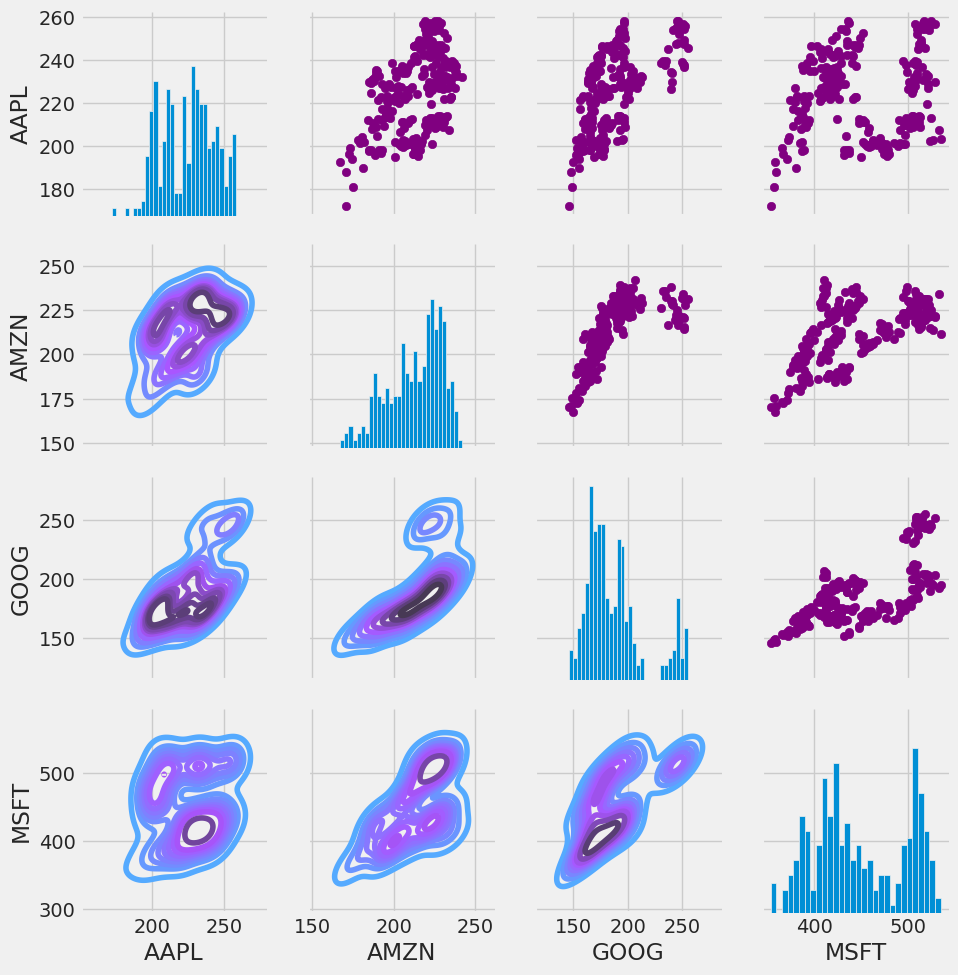

In [137]:
# Gráfico correlación de Precio de Cierre de nuestras diferentes acciones.
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

- También podemos hacer un gráfico de correlación, pero esta vez con valores numéricos.

Text(0.5, 1.0, 'Correlación de precio de cierre')

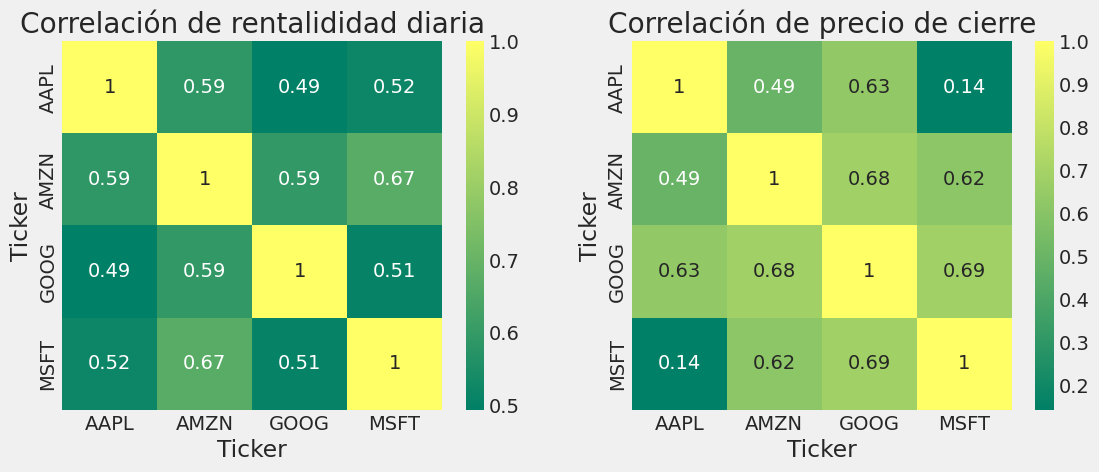

In [138]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlación de rentalididad diaria')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlación de precio de cierre')

### Se aprecia una interesante correlación de la rentabilidad diaria de Amazon y Microsoft (0.67)
### y una correlación del precio de cierre (Close) entre Amazon y Google  (0.69).
### La rentabilidad y el precio de todas las empresas tecnológicas estan positivamente correlacionados.


## 5. Cuanto arriesgar invirtiendo en una acción en particular

### Teoría
---

Hay varias formas en las que se puede cuantificar el riesgo. Una de las mas básicas es ***comparando la rentabilidad esperada con la desviación estandar*** de una distribución de rentabilidad.

***La desviación estándar mide el riesgo en una distribución de rentabilidad***, indicando qué tan dispersos están los rendimientos en torno a la media. Cuanto mayor es la desviación estándar, mayor es la volatilidad y, por lo tanto, el riesgo. Para comparar el riesgo entre inversiones, se compara directamente su desviación estándar: ***la que tenga el valor más alto será la más volátil y arriesgada.***
### Cómo se relaciona la media, la desviación estándar y el riesgo
  - **Media (promedio): Representa la rentabilidad esperada** de una inversión.
  - Desviación estándar: Es la medida del riesgo (volatilidad). Indica cuán lejos tienden a divergir los rendimientos reales de la media.
  - **Riesgo: Se considera alto cuando la desviación estándar es alta**, lo que significa que los rendimientos pueden variar significativamente por encima o por debajo de la media. Un riesgo bajo está asociado con una desviación estándar baja, lo que implica rendimientos más consistentes

###Cómo usar la desviación estándar para comparar inversiones
  - Calcular la desviación estándar: Se calcula la desviación estándar de los rendimientos históricos de cada inversión.
  - Comparar los resultados: Una vez calculada, la inversión con la desviación estándar más alta es la más volátil y, por lo tanto, la más arriesgada.
  - Considerar el balance: Si dos inversiones tienen rentabilidades medias similares, la que tenga la desviación estándar más baja se considerará más segura y consistente. Por el contrario, una inversión con una desviación estándar más alta podría ofrecer un potencial de mayor rentabilidad, pero también un riesgo de pérdidas más significativo.

In [139]:
tech_rets

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-10-16,NaN,NaN,NaN,NaN
2024-10-17,0.159641,0.342447,-1.337417,0.144194
2024-10-18,1.227652,0.778546,0.328255,0.345553
2024-10-21,0.629788,0.042331,0.454409,0.148270
2024-10-22,-0.262172,0.333204,0.615195,2.084634
...,...,...,...,...
2025-10-10,-3.452208,-4.992540,-1.948723,-2.189899
2025-10-13,0.974436,1.710039,3.010650,0.604743
2025-10-14,0.044416,-1.672199,0.633585,-0.093372


In [140]:
tech_rets.describe()

Ticker,AAPL,AMZN,GOOG,MSFT
count,250.000000,250.000000,250.000000,250.000000
mean,0.048572,0.077751,0.187043,0.097661
std,2.043567,2.136970,2.016578,1.559597
min,-9.245620,-8.979129,-7.506054,-6.180897
25%,-0.707417,-1.023741,-0.913738,-0.589033
50%,0.109450,0.052288,0.134891,0.122849
75%,0.902234,1.295496,1.335211,0.713596
max,15.328858,11.977032,9.878558,10.133687


In [141]:
tech_rets.columns

Index(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype='object', name='Ticker')

Text(0, 0.5, 'Riesgo')

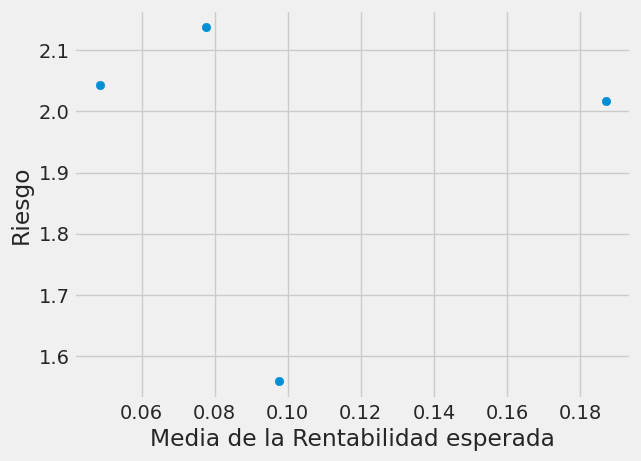

In [142]:
plt.scatter(tech_rets.mean(), tech_rets.std())
plt.xlabel('Media de la Rentabilidad esperada')
plt.ylabel('Riesgo')

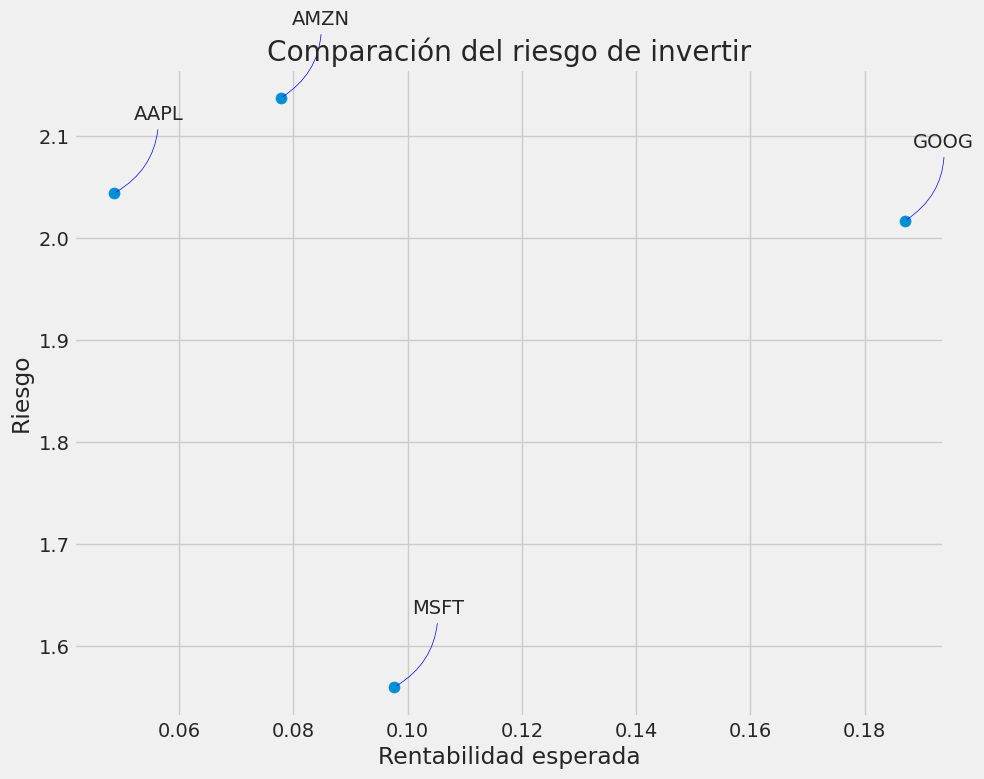

In [143]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Rentabilidad esperada')
plt.ylabel('Riesgo')
plt.title('Comparación del riesgo de invertir')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## 6. Predecir el precio de cierre de AAPL usando LSTM

### Para predecir el precio de cierre usando LSTM, debemos preparar los datos, crear el modelo LSTM, entrenarlo, evaluarlo y luego hacer predicciones.

In [144]:
# Obtener la cotización de las acciones, en este caso de la empresa Aple
df_aapl = yf.download('AAPL', start='2012-01-01', end=datetime.now())
df_aapl

/tmp/ipython-input-2971151899.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_aapl = yf.download('AAPL', start='2012-01-01', end=datetime.now())
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.345174,12.383300,12.278229,12.290238,302220800
2012-01-04,12.411518,12.448744,12.286635,12.308249,260022000
2012-01-05,12.549307,12.564917,12.388399,12.456845,271269600
2012-01-06,12.680496,12.691003,12.585032,12.601544,318292800
2012-01-09,12.660381,12.841103,12.648973,12.773558,394024400
...,...,...,...,...,...
2025-10-10,245.270004,256.380005,244.000000,254.940002,61999100
2025-10-13,247.660004,249.690002,245.559998,249.380005,38142900


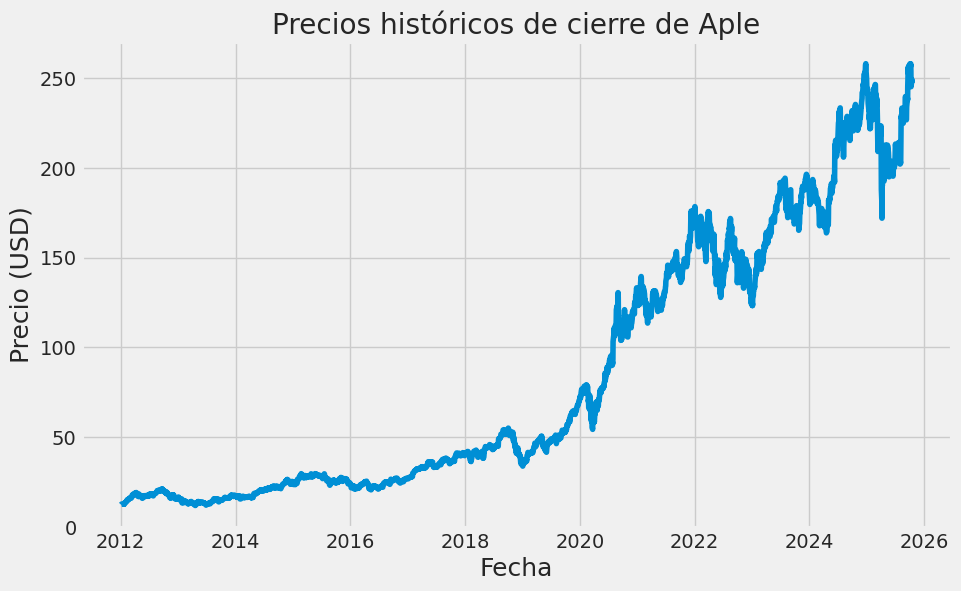

In [145]:
plt.figure(figsize=(10,6))
plt.title('Precios históricos de cierre de Aple')
plt.plot(df_aapl['Close'])
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio (USD)', fontsize=18)
plt.show()

In [146]:
# 1.- CREAR UN DATAFRAME CON UNICAMENTE LA COLUMNA 'Close'
data = df_aapl['Close']
dataset = data.to_numpy()
dataset
# Definir el número de filas de datos con las que se va a entrenar el modelo LSTM.
training_data_len = int(np.ceil( len(dataset) * .80 )) #80% de los datos para entrenamiento, 20% para pruebas
training_data_len

2775

In [147]:
data.head()

Ticker,AAPL
Date,
2012-01-03,12.345174
2012-01-04,12.411518
2012-01-05,12.549307
2012-01-06,12.680496
2012-01-09,12.660381


In [148]:
len(dataset), training_data_len

(3468, 2775)

In [149]:
data.columns

Index(['AAPL'], dtype='object', name='Ticker')

In [150]:
# 2.- ESCALAR LOS DATOS
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00182112],
       [0.00209059],
       [0.00265023],
       ...,
       [0.95802829],
       [0.96440501],
       [0.95672854]])

In [151]:
# 3.- CREAR EL SET DE DATOS DE ENTRENAMIENTO
# Crear el set de datos de enTrenamiento con datos escalados
train_data = scaled_data[0:int(training_data_len), :] #80%
# Dividir los datos de **entrenamiento** en sets individuales de features (X) y targets(y)
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0]) # 60 es la longitud de la secuencia de entrada utilizada para predecir el siguiente valor.
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(X_train)
        print(y_train)
        print()
# Convertir X_train y y_train en numpy arrays requeridos por LSTM
X_train, y_train = np.array(X_train), np.array(y_train)
# Transformar los datos en un formato de aprendizaje supervisado de tres dimensiones, que se conoce como "ventana deslizante".
# Reshape los datos
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

[array([0.00182112, 0.00209059, 0.00265023, 0.00318308, 0.00310138,
       0.0032855 , 0.00320135, 0.00305993, 0.00286727, 0.00346351,
       0.00400125, 0.00383541, 0.00292701, 0.00379395, 0.00294044,
       0.00614112, 0.00589359, 0.00621671, 0.00691538, 0.00733847,
       0.0073031 , 0.00717265, 0.00772865, 0.00825172, 0.00884433,
       0.00980147, 0.01181208, 0.01184258, 0.01296193, 0.01379832,
       0.01236077, 0.01291437, 0.01290338, 0.01445556, 0.01423485,
       0.01464333, 0.01537734, 0.01578583, 0.01696242, 0.01781962,
       0.01806715, 0.01815371, 0.01668809, 0.0163345 , 0.01638693,
       0.01776477, 0.01815251, 0.01898527, 0.02094836, 0.0235674 ,
       0.02307725, 0.02307847, 0.02497203, 0.02556465, 0.02514273,
       0.02475743, 0.02435632, 0.025689  , 0.02660346, 0.02698631])]
[np.float64(0.02604014625032395)]

[array([0.00182112, 0.00209059, 0.00265023, 0.00318308, 0.00310138,
       0.0032855 , 0.00320135, 0.00305993, 0.00286727, 0.00346351,
       0.00400125, 0.00

(2715, 60, 1)

In [152]:
training_data_len, training_data_len-60


(2775, 2715)

In [153]:
# 4.- CREAR Y ENTRENAR EL MODELO LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # Preferible para evitar warnings
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2715/2715 ━━━━━━━━━━━━━━━━━━━━ 131s 47ms/step - loss: 0.0014
Epoch 2/5
2715/2715 ━━━━━━━━━━━━━━━━━━━━ 127s 47ms/step - loss: 3.3927e-04
Epoch 3/5
2715/2715 ━━━━━━━━━━━━━━━━━━━━ 127s 47ms/step - loss: 2.2887e-04
Epoch 4/5
2715/2715 ━━━━━━━━━━━━━━━━━━━━ 127s 47ms/step - loss: 1.9182e-04
Epoch 5/5
2715/2715 ━━━━━━━━━━━━━━━━━━━━ 126s 46ms/step - loss: 1.6989e-04


In [154]:
# 5.- CREAR EL SET DE DATOS DE EVALUACIÓN / PRUEBA
# Crear un nuevo array de prueba
test_data = scaled_data[training_data_len - 60: , :]
# Crear los set de datos de prueba X_test and y_test
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

# Convertir los datos a numpy array
X_test = np.array(X_test)

# Reshape los datos de prueba
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

# Guardar los valores del precio que el modelo predice
predictions = model.predict(X_test)

# Convertir predicciones a scala original
predictions = scaler.inverse_transform(predictions)

# Calcular mean squared error (MSE)
mse = np.mean(np.square(predictions - y_test))
mse


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


np.float64(17.48671540127352)

In [155]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/tmp/ipython-input-2657761684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [156]:
valid['Predictions']

,Predictions
Date,
2023-01-12,130.615738
2023-01-13,130.623383
2023-01-17,131.795425
2023-01-18,132.899796
2023-01-19,132.383652
...,...
2025-10-10,248.071274
2025-10-13,240.488235
2025-10-14,243.599915


## 6.- Graficar resultados

/tmp/ipython-input-2952929341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


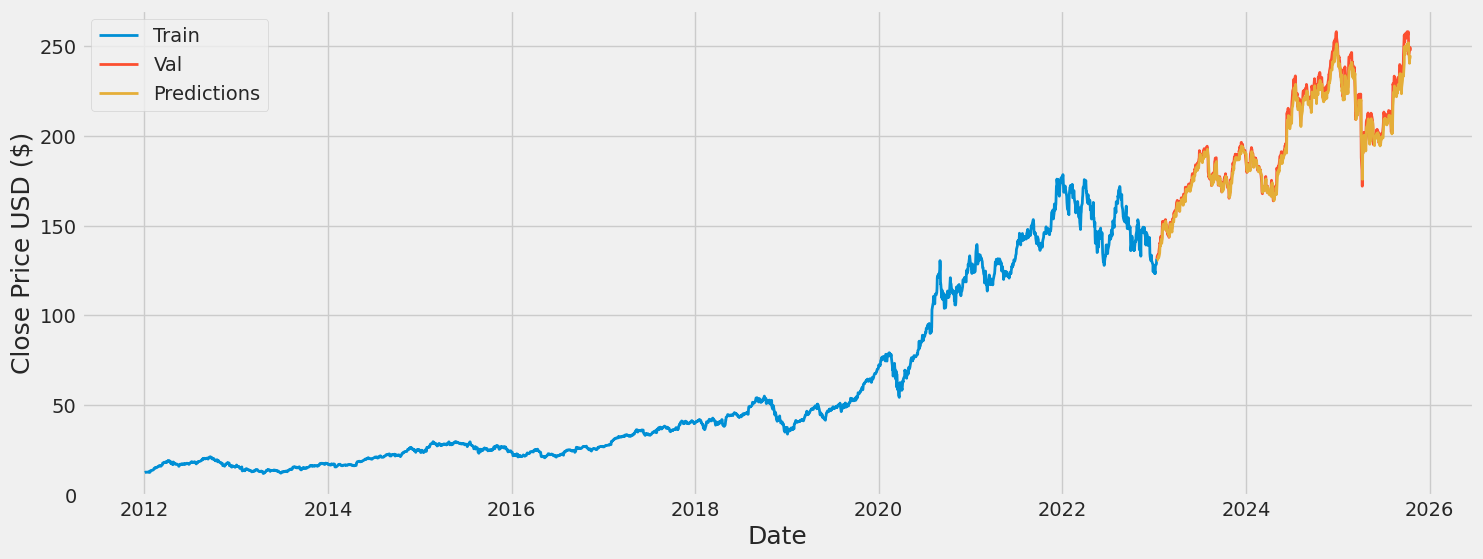

In [169]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['AAPL'], linewidth=2)
plt.plot(valid[['AAPL', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [161]:
valid

Ticker,AAPL,Predictions
Date,,
2023-01-12,131.554657,130.615738
2023-01-13,132.885864,130.623383
2023-01-17,134.049469,131.795425
2023-01-18,133.329636,132.899796
2023-01-19,133.388794,132.383652
...,...,...
2025-10-10,245.270004,248.071274
2025-10-13,247.660004,240.488235
2025-10-14,247.770004,243.599915


# RESUMEN
Se puede apreciar la facilidad de carga, exploración, análisis y predicción con LSTM y la comprensión de ciertos conceptos y teoría:
- **yfinance** facilita la carga de datos bursátiles historicos actualizados a la fecha que permiten evaluar la salud económica de una industria, el comportamiento del mercado, el riesgo y comparar el rendimiento de inversiones.
- Las librerias de Pandas, Mathplotlib, Seaborne ayudan a entender con claridad ciertos conceptos estadísticos fundamentales para la gestión técnica del mercado bursátil y para explicar con claridad a nuestros clientes el porque de nuestras conclusiones. Por ejemplo como los promedios móviles (MA)nos permiten visualizar el mejor rendimiento de las acciones; o porque el análisis de la media y la desviación estándar determinan el riesgo de una inversión.
- Por útimo podemos ver a LSTM en acción. Creamos un modelo con la inteligencia y el conocimiento suficiente para predecir el comportamiento en el tiempo del valor de las acciones de una empresa.
    - Cabe mencionar que la teoria de funcionamiento de LSTM y el proceso de la creación y optimización de un modelo (LSTM) han sido explicados extensamente en otros notebooks, de mi propia creación disponibles públicamente en GitHub.